<a href="https://colab.research.google.com/github/richi1998/Evaluating-Lexicon-Based-Models-versus-BERT-for-Sentence-Level-Sentiment-Ana-lysis-in-Swedish/blob/main/KB_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Downloading the necessary libraries

In [ ]:
from google.colab import files
uploaded = files.upload()
# Dataset is now stored in a Pandas Dataframe

Saving storaDatan.csv to storaDatan.csv


In [ ]:
!git clone https://github.com/Kungbib/swedish-bert-models
!git clone
!cd swedish-bert-models
!python3 -m venv venv
!source venv/bin/activate
!pip install --upgrade pip
!pip install -r /content/swedish-bert-models/requirements.txt

Cloning into 'swedish-bert-models'...
remote: Enumerating objects: 232, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 232 (delta 9), reused 0 (delta 0), pack-reused 202
Receiving objects: 100% (232/232), 41.73 KiB | 1.49 MiB/s, done.
Resolving deltas: 100% (74/74), done.
fatal: You must specify a repository to clone.

usage: git clone [<options>] [--] <repo> [<dir>]

    -v, --verbose         be more verbose
    -q, --quiet           be more quiet
    --progress            force progress reporting
    --reject-shallow      don't clone shallow repository
    -n, --no-checkout     don't create a checkout
    --bare                create a bare repository
    --mirror              create a mirror repository (implies bare)
    -l, --local           to clone from a local repository
    --no-hardlinks        don't use local hardlinks, always copy
    -s, --shared          setup as shared repository
    --recurse-submodules[

In [ ]:
import pandas as pd
import numpy as np



In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

tokenizer = AutoTokenizer.from_pretrained("KBLab/megatron-bert-large-swedish-cased-165k")
model = AutoModelForSequenceClassification.from_pretrained("KBLab/robust-swedish-sentiment-multiclass")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/904k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/906 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.48G [00:00<?, ?B/s]

### Testing the pipeline on a random made up sentence

In [ ]:
text = "Hon visade också upp en blodig kniv."
classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
result = classifier(text)

print(result)


[{'label': 'NEUTRAL', 'score': 0.5996408462524414}]


### Using the pipeline for our testdata

In [ ]:
df = pd.read_csv('storaDatan.csv', encoding="utf-8", names=['sentimentannotation','sentence','category'])

In [ ]:
resultaten = df['sentence'].apply(classifier)

In [ ]:
resultaten

0       [{'label': 'NEUTRAL', 'score': 0.7267245054244...
1       [{'label': 'POSITIVE', 'score': 0.929504215717...
2       [{'label': 'POSITIVE', 'score': 0.774442791938...
3       [{'label': 'POSITIVE', 'score': 0.971982359886...
4       [{'label': 'POSITIVE', 'score': 0.925107479095...
                              ...                        
1997    [{'label': 'NEGATIVE', 'score': 0.989413857460...
1998    [{'label': 'POSITIVE', 'score': 0.551344990730...
1999    [{'label': 'POSITIVE', 'score': 0.992811858654...
2000    [{'label': 'POSITIVE', 'score': 0.760084569454...
2001    [{'label': 'POSITIVE', 'score': 0.990821063518...
Name: sentence, Length: 2002, dtype: object

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def get_predictions(text):
    result = classifier(text)
    return result[0]['label']  # Adjust based on output structure

df['predicted_label'] = df['sentence'].apply(get_predictions)


In [ ]:
df

,sentimentannotation,sentence,category,predicted_label
0,1,Vårens första blommor har börjat blomma i träd...,egna meningar,NEUTRAL
1,1,Jag blev upplyft av det stöd jag fick från min...,egna meningar,POSITIVE
2,1,Den nya kaffebaren i grannskapet serverar utsö...,egna meningar,POSITIVE
3,1,Att lyssna på musik på morgonen gör mig glad h...,egna meningar,POSITIVE
4,1,Jag är tacksam för de lugna stunderna jag får ...,egna meningar,POSITIVE
...,...,...,...,...
1997,−1,"Det var det mest hiskeliga jag sett på länge ,...",Svenskt frasnät (SweFN),NEGATIVE
1998,1,Han var duktig i matte och gillade att räkna u...,Svenskt frasnät (SweFN),POSITIVE
1999,1,"Skön stämning och glada miner , det gillas ska...",Svenskt frasnät (SweFN),POSITIVE
2000,1,En sak som jag gillar med konferenser är att d...,Svenskt frasnät (SweFN),POSITIVE


### Creating a Confusion Matrix

Confusion Matrix:
 [[175 466  26]
 [  6 628  33]
 [  4 316 348]]
Precision (weighted): 0.7488440271805842
Recall (weighted): 0.5749250749250749
F1 Score (weighted): 0.5543659567931186


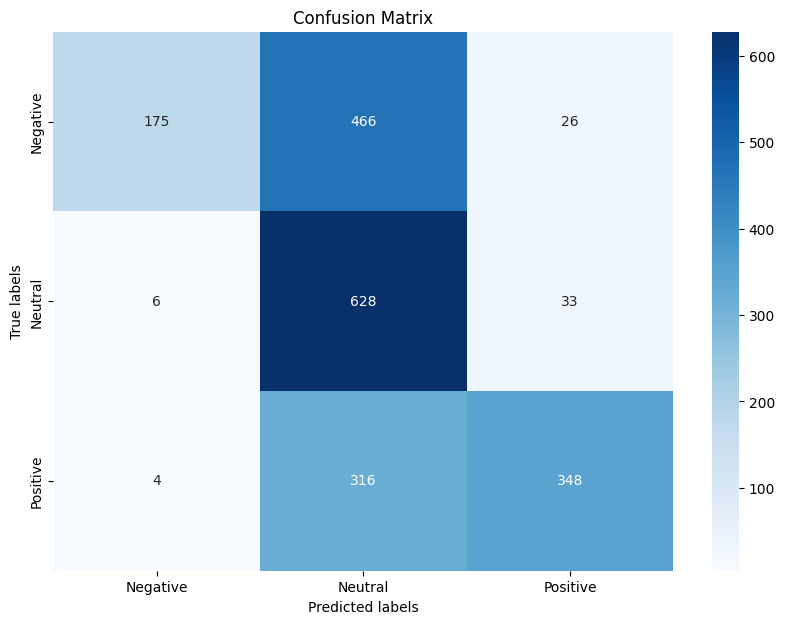

In [ ]:
label_mapping = {'1': 'POSITIVE', '0': 'NEUTRAL', '−1': 'NEGATIVE'}
df['true_label'] = df['sentimentannotation'].map(label_mapping)

y_true = df['true_label']  # Adjust column name as per your dataset
y_pred = df['predicted_label']
cm = confusion_matrix(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("Confusion Matrix:\n", cm)
print("Precision (weighted):", precision)
print("Recall (weighted):", recall)
print("F1 Score (weighted):", f1)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Check unique values in both columns
unique_true_labels = df['sentimentannotation'].unique()
unique_pred_labels = df['predicted_label'].unique()

print("Unique sentimentannotation:", unique_true_labels)
print("Unique Predicted Labels:", unique_pred_labels)

# If there are extra labels, decide on


Unique sentimentannotation: ['1' '0' '−1']
Unique Predicted Labels: ['NEUTRAL' 'POSITIVE' 'NEGATIVE']


In [ ]:
df

,sentimentannotation,sentence,category,predicted_label,true_label
0,1,Vårens första blommor har börjat blomma i träd...,egna meningar,NEUTRAL,POSITIVE
1,1,Jag blev upplyft av det stöd jag fick från min...,egna meningar,POSITIVE,POSITIVE
2,1,Den nya kaffebaren i grannskapet serverar utsö...,egna meningar,POSITIVE,POSITIVE
3,1,Att lyssna på musik på morgonen gör mig glad h...,egna meningar,POSITIVE,POSITIVE
4,1,Jag är tacksam för de lugna stunderna jag får ...,egna meningar,POSITIVE,POSITIVE
...,...,...,...,...,...
1997,−1,"Det var det mest hiskeliga jag sett på länge ,...",Svenskt frasnät (SweFN),NEGATIVE,NEGATIVE
1998,1,Han var duktig i matte och gillade att räkna u...,Svenskt frasnät (SweFN),POSITIVE,POSITIVE
1999,1,"Skön stämning och glada miner , det gillas ska...",Svenskt frasnät (SweFN),POSITIVE,POSITIVE
2000,1,En sak som jag gillar med konferenser är att d...,Svenskt frasnät (SweFN),POSITIVE,POSITIVE


In [ ]:
df

,sentimentannotation,sentence,category,predicted_label,true_label
0,1,Vårens första blommor har börjat blomma i träd...,egna meningar,NEUTRAL,POSITIVE
1,1,Jag blev upplyft av det stöd jag fick från min...,egna meningar,POSITIVE,POSITIVE
2,1,Den nya kaffebaren i grannskapet serverar utsö...,egna meningar,POSITIVE,POSITIVE
3,1,Att lyssna på musik på morgonen gör mig glad h...,egna meningar,POSITIVE,POSITIVE
4,1,Jag är tacksam för de lugna stunderna jag får ...,egna meningar,POSITIVE,POSITIVE
...,...,...,...,...,...
1997,−1,"Det var det mest hiskeliga jag sett på länge ,...",Svenskt frasnät (SweFN),NEGATIVE,NEGATIVE
1998,1,Han var duktig i matte och gillade att räkna u...,Svenskt frasnät (SweFN),POSITIVE,POSITIVE
1999,1,"Skön stämning och glada miner , det gillas ska...",Svenskt frasnät (SweFN),POSITIVE,POSITIVE
2000,1,En sak som jag gillar med konferenser är att d...,Svenskt frasnät (SweFN),POSITIVE,POSITIVE


### Creating a CSV file with the results and finding out the accuracy for the different labels

In [ ]:
resultaten.to_csv('bertaresult.csv', index=False)

In [ ]:
from sklearn.metrics import accuracy_score

# Get unique labels
unique_labels = df['true_label'].unique()

# Initialize a dictionary to store accuracy for each label
label_accuracies = {}

# Calculate accuracy for each label
for label in unique_labels:
    # Filter dataframe for instances of the current label
    label_df = df[df['true_label'] == label]

    # Count the total number of instances for the label
    total_instances = len(label_df)

    # Count the number of correctly predicted instances for the label
    correct_predictions = len(label_df[label_df['true_label'] == label_df['predicted_label']])

    # Calculate accuracy for the label
    if total_instances != 0:
        accuracy = correct_predictions / total_instances
    else:
        accuracy = 0

    # Store accuracy for the label in the dictionary
    label_accuracies[label] = accuracy

# Print accuracy for each label
for label, accuracy in label_accuracies.items():
    print(f"Accuracy for {label}: {accuracy}")


Accuracy for POSITIVE: 0.5209580838323353
Accuracy for NEUTRAL: 0.9415292353823088
Accuracy for NEGATIVE: 0.2623688155922039
